In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

df = pd.read_csv('Vodafone_Customer_Churn_Sample_Dataset.csv')
print('Dataset Dimensions', df.shape)

Dataset Dimensions (7043, 21)


In [109]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [112]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\n Missing values count: \n", missing_values)
print("\n Missing percentage: \n", missing_percentage)


 Missing values count: 
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

 Missing percentage: 
 customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges       

In [113]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [114]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [116]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isnull().sum()

np.int64(11)

In [117]:
df = df.dropna()
df.shape

(7032, 21)

In [119]:
df[['TotalCharges', 'tenure', 'MonthlyCharges']].describe()

,TotalCharges,tenure,MonthlyCharges
count,7032.000000,7032.000000,7032.000000
mean,2283.300441,32.421786,64.798208
std,2266.771362,24.545260,30.085974
min,18.800000,1.000000,18.250000
25%,401.450000,9.000000,35.587500
50%,1397.475000,29.000000,70.350000
75%,3794.737500,55.000000,89.862500
max,8684.800000,72.000000,118.750000


In [120]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [121]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

/var/folders/82/012yjtyd3n16dtqw9xv58xkr0000gn/T/ipykernel_82904/1296255047.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=axes[i], palette='viridis')
/var/folders/82/012yjtyd3n16dtqw9xv58xkr0000gn/T/ipykernel_82904/1296255047.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
/var/folders/82/012yjtyd3n16dtqw9xv58xkr0000gn/T/ipykernel_82904/1296255047.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=axes[i], palette='viridis')
/var/folders/82/012yjty

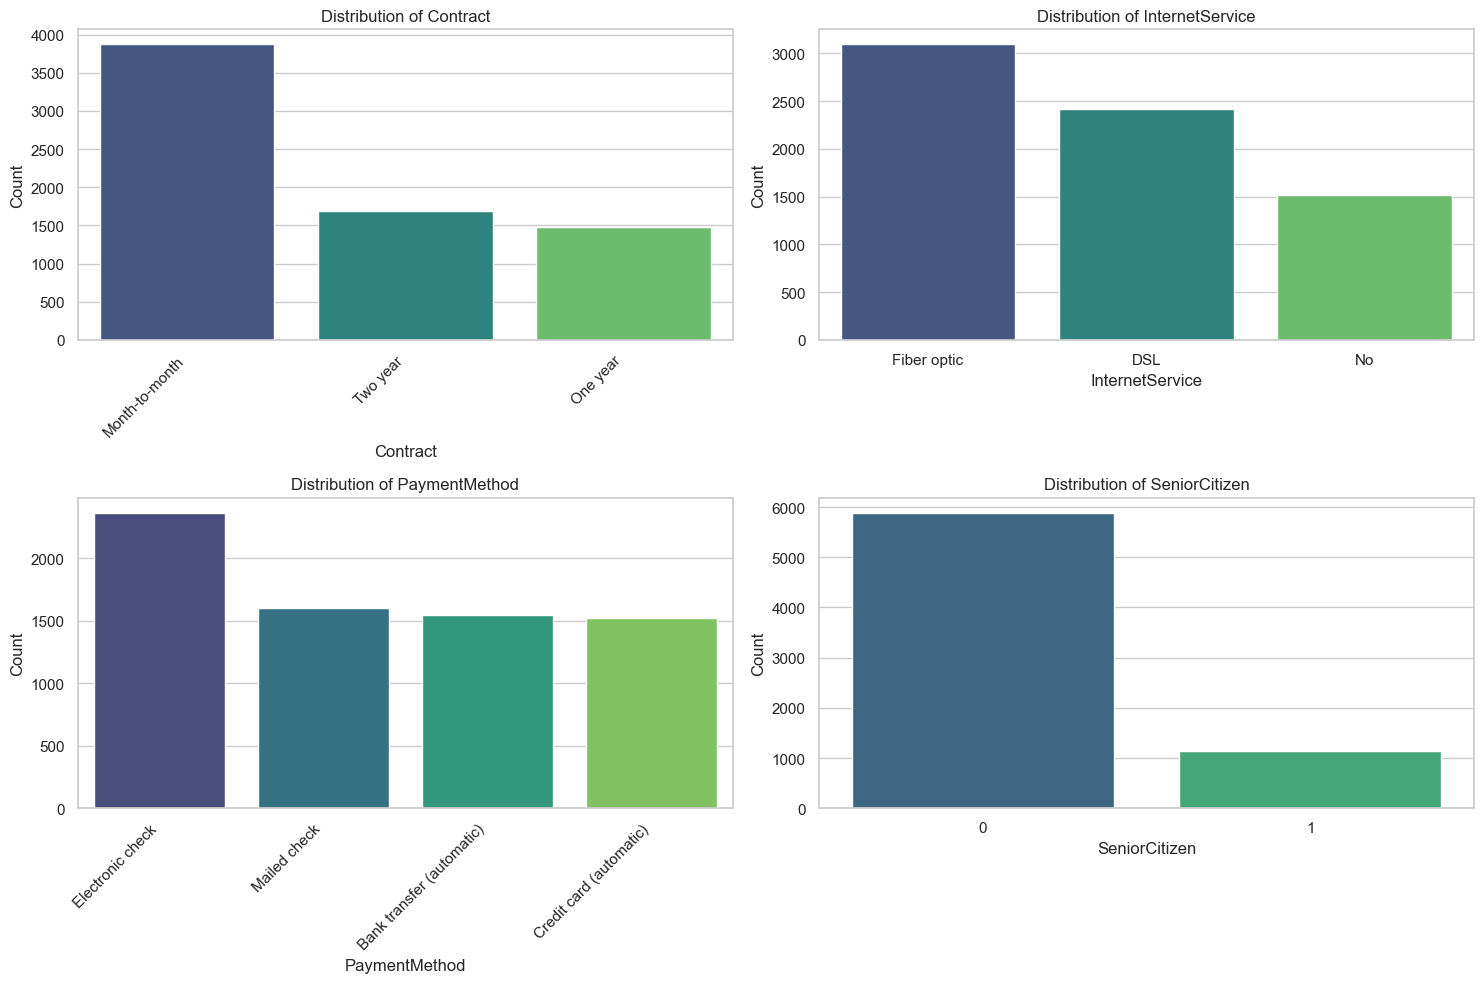

In [122]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_vars = ['Contract', 'InternetService', 'PaymentMethod', 'SeniorCitizen']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    counts = df[var].value_counts()
    sns.barplot(x=counts.index, y=counts.values, ax=axes[i], palette='viridis')

    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_ylabel('Count')
    
    if var in ['PaymentMethod', 'Contract']:
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


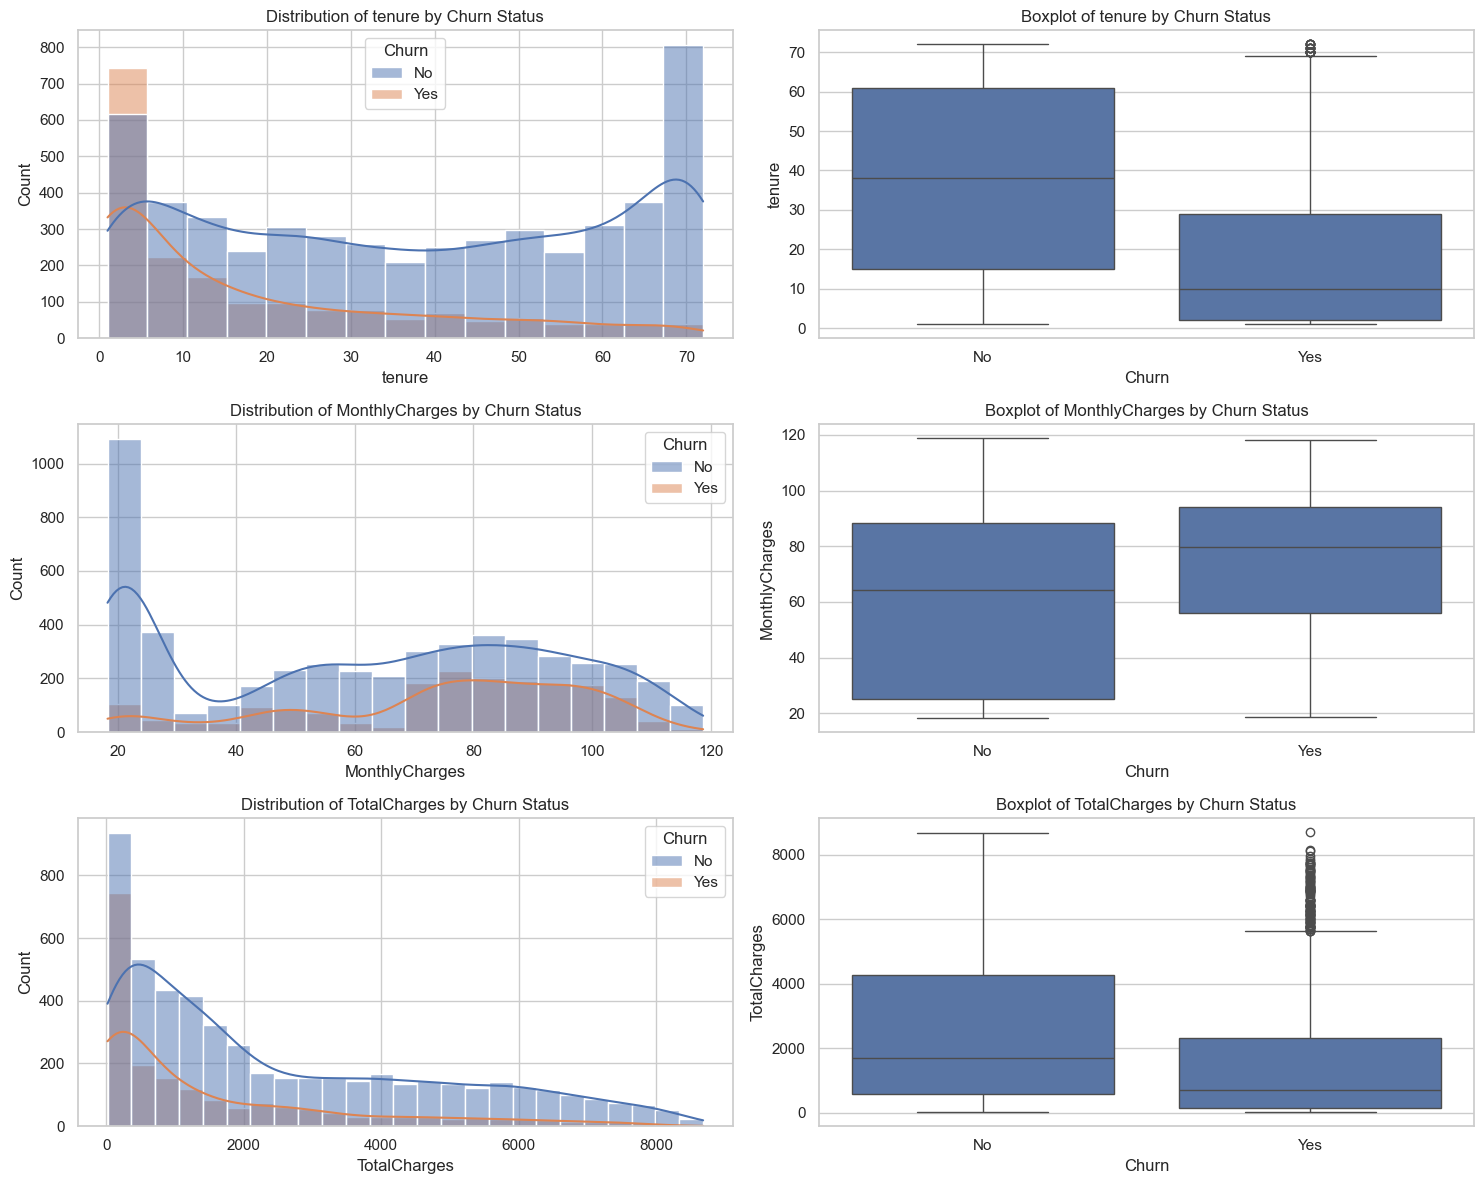

In [123]:
numerical_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, axes = plt.subplots(len(numerical_vars), 2, figsize=(15, 12))

for i, var in enumerate(numerical_vars):
    sns.histplot(data=df, x=var, hue='Churn', kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {var} by Churn Status')
    
    # Boxplot
    sns.boxplot(data=df, y=var, x='Churn', ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {var} by Churn Status')

plt.tight_layout()
plt.show()

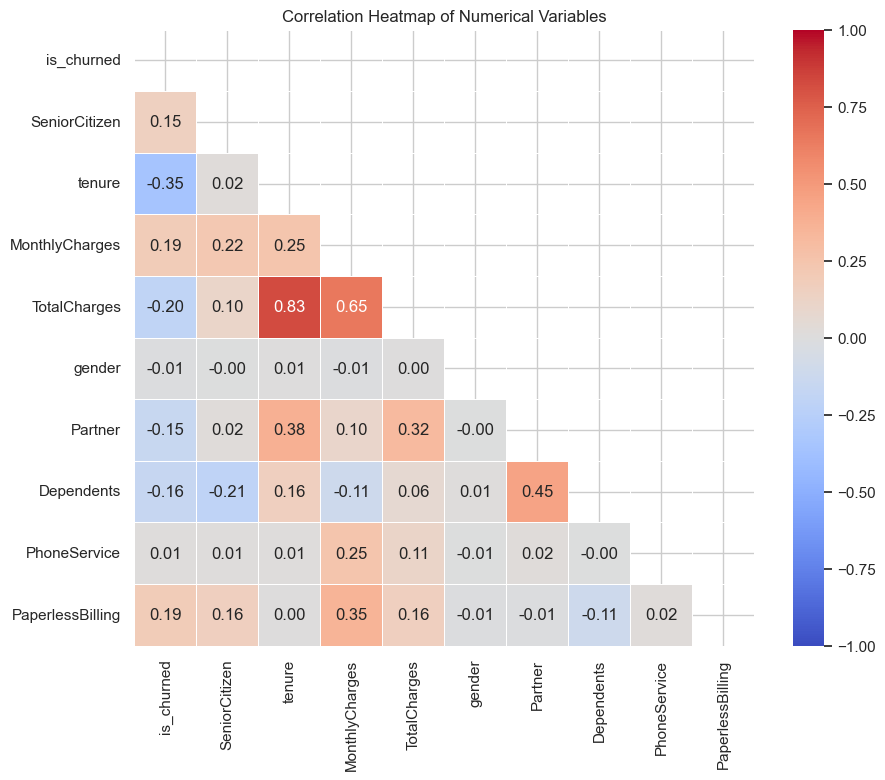

In [124]:
plt.figure(figsize=(10, 8))
df_corr = df.copy()
df_corr['is_churned'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})

binary_vars = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for var in binary_vars:
    df_corr[var] = df_corr[var].map({'Male': 1, 'Female': 0, 'Yes': 1, 'No': 0})
numeric_cols = ['is_churned', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'] + binary_vars

corr_matrix = df_corr[numeric_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            vmin=-1, vmax=1, center=0, linewidths=.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


Pre-processing data

In [125]:
# Binary encoding for Yes/No variables
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df['has_' + col.lower()] = df[col].map({'Yes': 1, 'No': 0})

In [126]:
# Handle gender
df['is_male'] = df['gender'].map({'Male': 1, 'Female': 0})

df['is_senior_citizen'] = df['SeniorCitizen']

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,has_partner,has_dependents,has_phoneservice,has_paperlessbilling,has_churn,is_male,is_senior_citizen
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,0,1,0,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0,0,1,0,0,1,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,0,1,1,1,1,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,0,0,0,0,1,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0,1,1,1,0,0


In [127]:
internet_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                    'TechSupport', 'StreamingTV', 'StreamingMovies']
for service in internet_services:
    df['has_' + service.lower()] = df[service].map({'Yes': 1, 'No': 0, 'No internet service': 0})

df['has_multiple_lines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service': 0})

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,has_partner,has_dependents,has_phoneservice,has_paperlessbilling,has_churn,is_male,is_senior_citizen,has_onlinesecurity,has_onlinebackup,has_deviceprotection,has_techsupport,has_streamingtv,has_streamingmovies,has_multiple_lines
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,0,1,0,0,0,0,1,0,0,0,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0,0,1,0,0,1,0,1,0,1,0,0,0,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,0,1,1,1,1,0,1,1,0,0,0,0,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,0,0,0,0,1,0,1,0,1,1,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0,1,1,1,0,0,0,0,0,0,0,0,0


In [128]:
#one hot encoding multiple values
multi_cat_cols = ['InternetService', 'Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=False)

# Check the first few rows of the encoded dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,has_partner,has_dependents,has_phoneservice,has_paperlessbilling,has_churn,is_male,is_senior_citizen,has_onlinesecurity,has_onlinebackup,has_deviceprotection,has_techsupport,has_streamingtv,has_streamingmovies,has_multiple_lines,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,No,Yes,No,No,No,No,Yes,29.85,29.85,No,1,0,0,1,0,0,0,0,1,0,0,0,0,0,True,False,False,True,False,False,False,False,True,False
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Yes,No,Yes,No,No,No,No,56.95,1889.50,No,0,0,1,0,0,1,0,1,0,1,0,0,0,0,True,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,Male,0,No,No,2,Yes,No,Yes,Yes,No,No,No,No,Yes,53.85,108.15,Yes,0,0,1,1,1,1,0,1,1,0,0,0,0,0,True,False,False,True,False,False,False,False,False,True
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,Yes,No,Yes,Yes,No,No,No,42.30,1840.75,No,0,0,0,0,0,1,0,1,0,1,1,0,0,0,True,False,False,False,True,False,True,False,False,False
4,9237-HQITU,Female,0,No,No,2,Yes,No,No,No,No,No,No,No,Yes,70.70,151.65,Yes,0,0,1,1,1,0,0,0,0,0,0,0,0,0,False,True,False,True,False,False,False,False,True,False


In [130]:
df.shape

(7032, 42)

In [ ]:
original_cols_to_drop = [
    'customerID', 
    'gender',     
    'SeniorCitizen', 
    'Partner',    
    'Dependents', 
    'PhoneService', 
    'MultipleLines', 
    'OnlineSecurity', 
    'OnlineBackup', 
    'DeviceProtection', 
    'TechSupport', 
    'StreamingTV', 
    'StreamingMovies', 
    'PaperlessBilling', 
    'Churn'       
]

df_cleaned = df.drop(columns=original_cols_to_drop)
df=df_cleaned
print(df.head())
print(df.info())